In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import datetime as dt

In [3]:
fdf = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\data_member.csv", index_col=0) # for Windows
# fdf = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/data member.csv', index_col=0) # for MacOS

fdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590565 entries, 0 to 590564
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ent              590565 non-null  object
 1   original_status  590565 non-null  object
 2   join_month       590565 non-null  int64 
 3   join_year        590565 non-null  int64 
 4   sponsor          590565 non-null  object
dtypes: int64(2), object(3)
memory usage: 27.0+ MB


In [4]:
## FOR Windows
t21_df = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\new_transaction 2021.csv", index_col=0)
t22_df = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\new_transaction 2022.csv", index_col=0)
t23_df = pd.read_csv("D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\new_transaction 2023.csv", index_col=0)

## FOR Mac
# t21_df = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/new_transaction 2021.csv', index_col=0)
# t22_df = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/new_transaction 2022.csv', index_col=0)
# t23_df = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/new_transaction 2023.csv', index_col=0)

tall_df = pd.concat([t21_df,t22_df,t23_df])
tall_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4129114 entries, 0 to 643128
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   payment_date       object 
 1   ent                object 
 2   center             object 
 3   total_amount       float64
 4   discount           float64
 5   paid_amount        int64  
 6   trans_origin_type  object 
 7   product            object 
 8   qty                int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 315.0+ MB


In [5]:
## for Windows

ff = pd.read_csv('D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\transaction 2021.csv', index_col=0)
ff1 = pd.read_csv('D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\transaction 2022.csv', index_col=0)
ff2 = pd.read_csv('D:\DATA_Science\DATASET\WEEK05_AdvancedAnalytics\\transaction 2023.csv', index_col=0)

## for MacOS

# ff = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/transaction 2021.csv', index_col=0)
# ff1 = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/transaction 2022.csv', index_col=0)
# ff2 = pd.read_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/transaction 2023.csv', index_col=0)

o_df = pd.concat([ff,ff1,ff2])
o_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2406316 entries, 0 to 362108
Data columns (total 8 columns):
 #   Column             Dtype  
---  ------             -----  
 0   payment_date       object 
 1   ent                object 
 2   center             object 
 3   product_json       object 
 4   total_amount       float64
 5   discount           float64
 6   paid_amount        int64  
 7   trans_origin_type  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 165.2+ MB


# STEP 1
- Clean DATA

In [6]:
fdf['join'] = pd.to_datetime(fdf['join_year'].astype(str) + '/' + fdf['join_month'].astype(str) + '/01')
fdf = fdf.loc[:,['ent','original_status','sponsor','join']]
fdf['mem_duration(months)'] = round((dt.datetime(2023, 7, 1)-fdf['join'])/np.timedelta64(1, 'M'))

fdf

,ent,original_status,sponsor,join,mem_duration(months)
0,UCC4CC4F,-,8844CQCEY,2014-05-01,110.0
1,UCC4CCEK,-,8844CQCCU,2014-05-01,110.0
2,UCC4CC15,-,8844CQCEY,2014-05-01,110.0
3,UCC4CCR2,-,8844CQCEY,2014-05-01,110.0
4,UCC4CCJP,-,8844CQCEY,2014-05-01,110.0
...,...,...,...,...,...
590560,H3CCC43B,A,H3CCC4R2,2010-07-01,156.0
590561,H3CCC4ZY,A,H3CCC4JP,2010-06-01,157.0
590562,H3CCCEC7,A,H3CCC4JP,2010-07-01,156.0
590563,H3CCCE4I,A,H3CCC4JP,2010-07-01,156.0


In [7]:
# Change Date format
tall_df['payment_date'] = pd.to_datetime(tall_df['payment_date'], format='%Y-%m-%d %H:%M:%S')
tall_df['payment_date'] = pd.to_datetime( tall_df['payment_date'].dt.to_period('M').astype(str) )

o_df['payment_date'] = pd.to_datetime(o_df['payment_date'], format='%Y-%m-%d %H:%M:%S')
o_df['payment_date'] = pd.to_datetime( o_df['payment_date'].dt.to_period('M').astype(str) )

tall_df

,payment_date,ent,center,total_amount,discount,paid_amount,trans_origin_type,product,qty
0,2021-01-01,TCC43RQQZ3B,TKC4CJ,1627000.0,0.0,0,online,1ECZ,1
1,2021-01-01,TCC43RQQZ3B,TKC4CJ,1627000.0,0.0,0,online,8CEC4Q,1
2,2021-01-01,TCC4Q4JZ4Q0,TKCEWQ,594000.0,0.0,0,online,4E4W,2
3,2021-01-01,TCC4Q4JZ4Q0,TKCEWQ,594000.0,0.0,0,online,DC4CC4,1
4,2021-01-01,TCC4RJ11QE7,TKC14E,468000.0,0.0,0,online,IC4CC4,1
...,...,...,...,...,...,...,...,...,...
643124,2023-07-01,TCCEREZCC10,TKC1Z4,2500.0,NaN,2500,offline,KCQCEJ,1
643125,2023-07-01,TCCEQ1RJ3JY,TKC1Z4,2500.0,NaN,2500,offline,KCQCEJ,1
643126,2023-07-01,TCCEQ4Z4R4Y,TKC1Z4,2500.0,NaN,2500,offline,KCQCEJ,1
643127,2023-07-01,TCCEQEZJQ4F,TKC1Z4,2500.0,NaN,2500,offline,KCQCER,1


- Transform

In [8]:
# Prepare Columns

# Total Sales
j0 = pd.DataFrame(o_df.groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum()))
j1 = pd.DataFrame(o_df.loc[o_df['payment_date'] > dt.datetime(2023, 4, 1)
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_last_3m'})                       
j2 = pd.DataFrame(o_df.loc[o_df['payment_date'] > dt.datetime(2023, 1, 1)
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_last_6m'}) 
# Total Sales Online
j3 = pd.DataFrame(o_df.loc[o_df['trans_origin_type']=='online'
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_online'}) 
j4 = pd.DataFrame(o_df.loc[(o_df['payment_date'] > dt.datetime(2023, 4, 1)) 
                                & (o_df['trans_origin_type']=='online')
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_last_3m_online'})
j5 = pd.DataFrame(o_df.loc[(o_df['payment_date'] > dt.datetime(2023, 1, 1)) 
                                & (o_df['trans_origin_type']=='online')
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_last_6m_online'})
# Total Sales Offline
j6 = pd.DataFrame(o_df.loc[o_df['trans_origin_type']=='offline'
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_offline'})
j7 = pd.DataFrame(o_df.loc[(o_df['payment_date'] > dt.datetime(2023, 4, 1)) 
                                & (o_df['trans_origin_type']=='offline')
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_last_3m_offline'})
j8 = pd.DataFrame(o_df.loc[(o_df['payment_date'] > dt.datetime(2023, 1, 1)) 
                                & (o_df['trans_origin_type']=='offline')
                                ].groupby(by=['ent'])['total_amount'].apply(lambda x: x.sum())
                                ).rename(columns={'total_amount':'total_last_6m_offline'})

#########################################  Sponsor count  ####################################################

j9 = pd.DataFrame(fdf.groupby(by=['sponsor'])['ent'].apply(lambda x: x.nunique())
                  ).rename(columns={'ent':'total_network'})
j10 = o_df.loc[o_df['payment_date'] > dt.datetime(2023, 4, 1),['ent']]
j10 = pd.merge(j10, fdf.loc[:,['ent','sponsor']], how='left', left_on=['ent'], right_on=['ent'])

j10 = pd.DataFrame(j10.groupby(by=['sponsor'])['ent'].apply(lambda x: x.nunique())
                   ).rename(columns={'ent':'network_last_3m'})

j11 = o_df.loc[o_df['payment_date'] > dt.datetime(2023, 1, 1),['ent']]
j11 = pd.merge(j11, fdf.loc[:,['ent','sponsor']], how='left', left_on=['ent'], right_on=['ent'])

j11 = pd.DataFrame(j11.groupby(by=['sponsor'])['ent'].apply(lambda x: x.nunique())
                   ).rename(columns={'ent':'network_last_6m'})

############################################################################################################

# Total Transaction
j12 = pd.DataFrame(o_df.groupby(by=['ent'])['payment_date'].apply(lambda x: x.count())
                   ).rename(columns={'payment_date':'total_transaction'})
j13 = pd.DataFrame(o_df.loc[o_df['payment_date'] > dt.datetime(2023, 4, 1)
                      ].groupby(by=['ent'])['payment_date'].apply(lambda x: x.count())
                      ).rename(columns={'payment_date':'transaction_last3m'})
j14 = pd.DataFrame(o_df.loc[o_df['payment_date'] > dt.datetime(2023, 1, 1)
                      ].groupby(by=['ent'])['payment_date'].apply(lambda x: x.count())
                      ).rename(columns={'payment_date':'transaction_last6m'})
# Total Quantity
j15 = pd.DataFrame(tall_df.groupby(by=['ent'])['qty'].apply(lambda x: x.sum())).rename(columns={'qty':'total_qty'})
j16 = pd.DataFrame(tall_df.loc[tall_df['payment_date'] > dt.datetime(2023, 4, 1)
                               ].groupby(by=['ent'])['qty'].apply(lambda x: x.sum())
                               ).rename(columns={'qty':'qty_last3m'})
j17 = pd.DataFrame(tall_df.loc[tall_df['payment_date'] > dt.datetime(2023, 1, 1)
                               ].groupby(by=['ent'])['qty'].apply(lambda x: x.sum())
                               ).rename(columns={'qty':'qty_last6m'})
# SKU
j18 = pd.DataFrame(tall_df.groupby(by=['ent'])['product']
                   .apply(lambda x: x.nunique() )
                   ).rename(columns={'product':'sku_penetrate(%)'})
j18['sku_penetrate(%)'] = round(j18['sku_penetrate(%)']/len(tall_df['product'].unique()),3)
j19 = pd.DataFrame(tall_df.loc[tall_df['payment_date'] > dt.datetime(2023, 4, 1)]
                   .groupby(by=['ent'])['product']
                   .apply(lambda x: x.nunique() )
                   ).rename(columns={'product':'sku_last3m'})
j19['sku_last3m'] = round(j19['sku_last3m']/len(tall_df['product'].unique()),3)
j20 = pd.DataFrame(tall_df.loc[tall_df['payment_date'] > dt.datetime(2023, 1, 1)]
                   .groupby(by=['ent'])['product']
                   .apply(lambda x: x.nunique() )
                   ).rename(columns={'product':'sku_last6m'})
j20['sku_last6m'] = round(j20['sku_last6m']/len(tall_df['product'].unique()),3)

In [9]:
# JOIN COLUMN

df = pd.DataFrame(tall_df['ent'].unique()).rename(columns={0:'ent'})
df = pd.merge(df, fdf.loc[:,['ent','mem_duration(months)']] ,how='outer' , left_on=['ent'], right_on=['ent'])

tomerge = [j0,j1,j2,j3,j4,j5,j6,j7,j8,j9,j10,j11,j12,j13,j14,j15,j16,j17,j18,j19,j20]

for n,i in enumerate(tomerge) : 
    if 9 <= n <= 11 :
        df = pd.merge(df, i ,how='left' , left_on=['ent'], right_on=['sponsor'])
    else : 
        df = pd.merge(df, i ,how='left' , left_on=['ent'], right_on=['ent'])

df

,ent,mem_duration(months),total_amount,total_last_3m,total_last_6m,total_online,total_last_3m_online,total_last_6m_online,total_offline,total_last_3m_offline,...,network_last_6m,total_transaction,transaction_last3m,transaction_last6m,total_qty,qty_last3m,qty_last6m,sku_penetrate(%),sku_last3m,sku_last6m
0,TCC43RQQZ3B,NaN,2037000.0,NaN,NaN,1627000.0,NaN,NaN,410000.0,NaN,...,NaN,2.0,NaN,NaN,3.0,NaN,NaN,0.005,NaN,NaN
1,TCC4Q4JZ4Q0,NaN,795500.0,NaN,NaN,793000.0,NaN,NaN,2500.0,NaN,...,NaN,3.0,NaN,NaN,5.0,NaN,NaN,0.007,NaN,NaN
2,TCC4RJ11QE7,43.0,31365000.0,NaN,1005000.0,28385000.0,NaN,1005000.0,2980000.0,NaN,...,1.0,23.0,NaN,1.0,63.0,NaN,3.0,0.032,NaN,0.002
3,TCC434QRCJY,NaN,341000.0,NaN,NaN,341000.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,0.002,NaN,NaN
4,TCC43RRCE10,NaN,189000.0,NaN,NaN,189000.0,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,0.002,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796541,H3CCC43B,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796542,H3CCC4ZY,157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796543,H3CCCEC7,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
796544,H3CCCE4I,156.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.isna().sum()

ent                           0
mem_duration(months)     205981
total_amount             215722
total_last_3m            747559
total_last_6m            708678
total_online             454919
total_last_3m_online     764350
total_last_6m_online     737153
total_offline            387369
total_last_3m_offline    768201
total_last_6m_offline    743662
total_network            680299
network_last_3m          777303
network_last_6m          768016
total_transaction        215722
transaction_last3m       747559
transaction_last6m       708678
total_qty                215722
qty_last3m               747559
qty_last6m               708678
sku_penetrate(%)         215722
sku_last3m               747559
sku_last6m               708678
dtype: int64

In [11]:
df['ticket_size'] = round(df['total_amount']/df['total_qty'],3)
df['ticket_size_3m'] = round(df['total_last_3m']/df['qty_last3m'],3)
df['ticket_size_6m'] = round(df['total_last_6m']/df['qty_last6m'],3)

df = df.drop(columns=['total_qty','qty_last3m','qty_last6m'])
df = df.fillna(0)
df

,ent,mem_duration(months),total_amount,total_last_3m,total_last_6m,total_online,total_last_3m_online,total_last_6m_online,total_offline,total_last_3m_offline,...,network_last_6m,total_transaction,transaction_last3m,transaction_last6m,sku_penetrate(%),sku_last3m,sku_last6m,ticket_size,ticket_size_3m,ticket_size_6m
0,TCC43RQQZ3B,0.0,2037000.0,0.0,0.0,1627000.0,0.0,0.0,410000.0,0.0,...,0.0,2.0,0.0,0.0,0.005,0.0,0.000,679000.000,0.0,0.0
1,TCC4Q4JZ4Q0,0.0,795500.0,0.0,0.0,793000.0,0.0,0.0,2500.0,0.0,...,0.0,3.0,0.0,0.0,0.007,0.0,0.000,159100.000,0.0,0.0
2,TCC4RJ11QE7,43.0,31365000.0,0.0,1005000.0,28385000.0,0.0,1005000.0,2980000.0,0.0,...,1.0,23.0,0.0,1.0,0.032,0.0,0.002,497857.143,0.0,335000.0
3,TCC434QRCJY,0.0,341000.0,0.0,0.0,341000.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.002,0.0,0.000,341000.000,0.0,0.0
4,TCC43RRCE10,0.0,189000.0,0.0,0.0,189000.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.002,0.0,0.000,189000.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796541,H3CCC43B,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0
796542,H3CCC4ZY,157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0
796543,H3CCCEC7,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0
796544,H3CCCE4I,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0


In [12]:
def amountvsyr(df):
    # Create a scatter plot
    sns.scatterplot(x='mem_duration(months)', y='total_amount', data=df)

    mean_x = df['mem_duration(months)'].mean()
    mean_y = df['total_amount'].mean()

    # Plot horizontal mean line
    plt.axhline(mean_y, color='r', linestyle='--', label='Sum Total Amount')

    # Plot vertical mean line
    plt.axvline(mean_x, color='b', linestyle='--', label='Month')

    # Add legend
    plt.legend()

    plt.xlabel('Month')
    plt.ylabel('Sum Total Amount')
    plt.title('Sum Total Amount VS Duration (Months)')

    # Show the plot
    plt.show()

In [13]:
# df.to_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/week05_transform_data-with-outlier.csv')

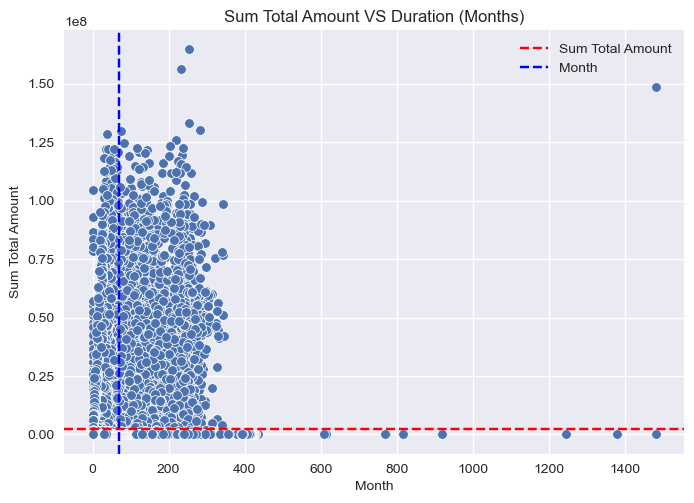

In [14]:
plt.style.use('seaborn-v0_8')

amountvsyr(df)

In [15]:
df = df.reset_index(drop = True)
df

,ent,mem_duration(months),total_amount,total_last_3m,total_last_6m,total_online,total_last_3m_online,total_last_6m_online,total_offline,total_last_3m_offline,...,network_last_6m,total_transaction,transaction_last3m,transaction_last6m,sku_penetrate(%),sku_last3m,sku_last6m,ticket_size,ticket_size_3m,ticket_size_6m
0,TCC43RQQZ3B,0.0,2037000.0,0.0,0.0,1627000.0,0.0,0.0,410000.0,0.0,...,0.0,2.0,0.0,0.0,0.005,0.0,0.000,679000.000,0.0,0.0
1,TCC4Q4JZ4Q0,0.0,795500.0,0.0,0.0,793000.0,0.0,0.0,2500.0,0.0,...,0.0,3.0,0.0,0.0,0.007,0.0,0.000,159100.000,0.0,0.0
2,TCC4RJ11QE7,43.0,31365000.0,0.0,1005000.0,28385000.0,0.0,1005000.0,2980000.0,0.0,...,1.0,23.0,0.0,1.0,0.032,0.0,0.002,497857.143,0.0,335000.0
3,TCC434QRCJY,0.0,341000.0,0.0,0.0,341000.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.002,0.0,0.000,341000.000,0.0,0.0
4,TCC43RRCE10,0.0,189000.0,0.0,0.0,189000.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.002,0.0,0.000,189000.000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796541,H3CCC43B,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0
796542,H3CCC4ZY,157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0
796543,H3CCCEC7,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0
796544,H3CCCE4I,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796546 entries, 0 to 796545
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ent                    796546 non-null  object 
 1   mem_duration(months)   796546 non-null  float64
 2   total_amount           796546 non-null  float64
 3   total_last_3m          796546 non-null  float64
 4   total_last_6m          796546 non-null  float64
 5   total_online           796546 non-null  float64
 6   total_last_3m_online   796546 non-null  float64
 7   total_last_6m_online   796546 non-null  float64
 8   total_offline          796546 non-null  float64
 9   total_last_3m_offline  796546 non-null  float64
 10  total_last_6m_offline  796546 non-null  float64
 11  total_network          796546 non-null  float64
 12  network_last_3m        796546 non-null  float64
 13  network_last_6m        796546 non-null  float64
 14  total_transaction      796546 non-nu

# STEP 2
- Prepare DATA
- Selecting clustering samples.

In [17]:
# pip install scikit-learn-extra

In [18]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture
from yellowbrick.cluster import KElbowVisualizer

K-Elbow Method

In [19]:
# model = KMeans(n_init='auto')
# visualizer = KElbowVisualizer(model, k=(2,12))

# visualizer.fit(df)
# visualizer.show()

Silhouette Method

In [20]:
# from sklearn.metrics import silhouette_score

# range_n_clusters = [2, 3, 4, 5, 6]
# for n_clusters in range_n_clusters:
#     clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
#     cluster_labels = clusterer.fit_predict(df)
#     silhouette_avg = silhouette_score(df, cluster_labels)
#     print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg)

BI SCORE

In [21]:
def gmm_bic_score(estimator, X):
    """Callable to pass to GridSearchCV that will use the BIC score."""
    # Make it negative since GridSearchCV expects a score to maximize
    return -estimator.bic(X)

def bicscore(X):
    param_grid = {
        "n_components": range(1, 7),
        "covariance_type": ["spherical", "tied", "diag", "full"] 
        }
    grid_search = GridSearchCV(
        GaussianMixture(), param_grid=param_grid, scoring=gmm_bic_score)

    grid_search.fit(X)

    df = pd.DataFrame(grid_search.cv_results_)[
        ["param_n_components", "param_covariance_type", "mean_test_score"]
    ]
    df["mean_test_score"] = -df["mean_test_score"]
    df = df.rename(
        columns={
            "param_n_components": "Number of components",
            "param_covariance_type": "Type of covariance",
            "mean_test_score": "BIC score",
        }
    )
    return df.sort_values(by="BIC score").head()

In [23]:
df_c = df.drop(columns=['ent'])

bicscore(df_c)

C:\Users\rastu\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rastu\AppData\Roaming\Python\Python310\site-packages\sklearn\mixture\_gaussian_mixture.py", line 340, in _compute_precision_cholesky
    cov_chol = linalg.cholesky(covariances, lower=True)
  File "c:\ProgramData\anaconda3\lib\site-packages\scipy\linalg\_decomp_cholesky.py", line 89, in cholesky
    c, lower = _cholesky(a, lower=lower, overwrite_a=overwrite_a, clean=True,
  File "c:\ProgramData\anaconda3\lib\site-packages\scipy\linalg\_deco

,Number of components,Type of covariance,BIC score
17,6,diag,2.901454e+06
16,5,diag,3.678655e+06
15,4,diag,3.868637e+06
14,3,diag,5.120533e+06
13,2,diag,5.673671e+06


In [ ]:
raise Exception

Exception: 

# RESULTS

- Gaussian Mixture

> Gaussian mixture models are also relatively robust to outliers, meaning that they can still yield accurate results even if there are some data points that do not fit neatly into any of the clusters.
>
> source : https://vitalflux.com/gaussian-mixture-models-what-are-they-when-to-use/

In [24]:
cl = GaussianMixture(n_components=6, covariance_type='diag', random_state=42)

df['cluster'] = cl.fit(df_c).predict(df_c)
df

,ent,mem_duration(months),total_amount,total_last_3m,total_last_6m,total_online,total_last_3m_online,total_last_6m_online,total_offline,total_last_3m_offline,...,total_transaction,transaction_last3m,transaction_last6m,sku_penetrate(%),sku_last3m,sku_last6m,ticket_size,ticket_size_3m,ticket_size_6m,cluster
0,TCC43RQQZ3B,0.0,2037000.0,0.0,0.0,1627000.0,0.0,0.0,410000.0,0.0,...,2.0,0.0,0.0,0.005,0.0,0.000,679000.000,0.0,0.0,5
1,TCC4Q4JZ4Q0,0.0,795500.0,0.0,0.0,793000.0,0.0,0.0,2500.0,0.0,...,3.0,0.0,0.0,0.007,0.0,0.000,159100.000,0.0,0.0,5
2,TCC4RJ11QE7,43.0,31365000.0,0.0,1005000.0,28385000.0,0.0,1005000.0,2980000.0,0.0,...,23.0,0.0,1.0,0.032,0.0,0.002,497857.143,0.0,335000.0,1
3,TCC434QRCJY,0.0,341000.0,0.0,0.0,341000.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.002,0.0,0.000,341000.000,0.0,0.0,5
4,TCC43RRCE10,0.0,189000.0,0.0,0.0,189000.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.002,0.0,0.000,189000.000,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796541,H3CCC43B,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0,5
796542,H3CCC4ZY,157.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0,5
796543,H3CCCEC7,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0,5
796544,H3CCCE4I,156.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000,0.0,0.000,0.000,0.0,0.0,5


In [26]:
# df.to_csv('D:\DATA_Science\GitHub\BeforeGIT\week05_segment_result.csv')

# for MacOS
# df.to_csv('~/Documents/DATAScience/TempBeforeGit/member and transaction data/week05_segment_result.csv')

PLOT (Gaussian Mixture Model)

In [28]:
# Prepare data for a Visualization

dfk = df.drop(columns=['ent']).reset_index(drop=True)

bfc = Pipeline(
    steps=[("normalization", MinMaxScaler()),
           ('PCA',PCA(n_components=2, random_state=42))
           ])

dfk = bfc.fit_transform(dfk)

dfk = pd.DataFrame(dfk)

display(dfk)

,0,1
0,-0.092998,-0.069467
1,-0.094617,-0.038151
2,0.739984,0.007812
3,-0.096848,-0.047754
4,-0.097484,-0.038491
...,...,...
796541,-0.104905,0.074569
796542,-0.104941,0.075217
796543,-0.104902,0.074571
796544,-0.104905,0.074569


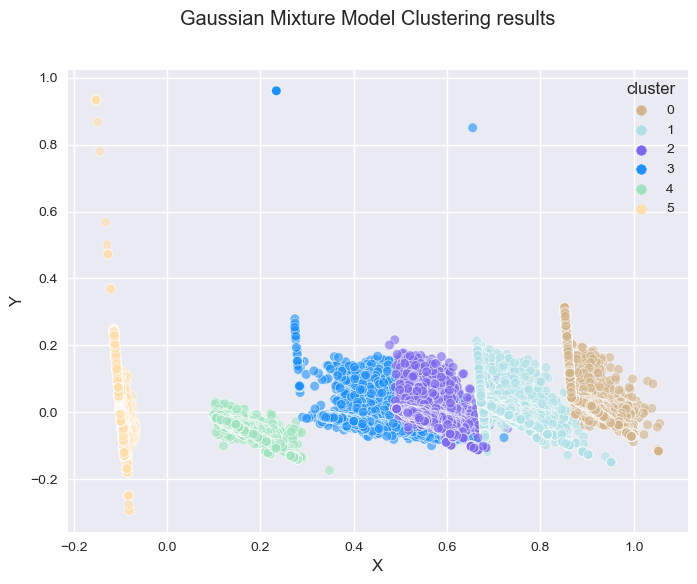

In [29]:
# Getting unique labels
 
dfk['cluster'] = df['cluster']
 
# plotting the results:
 
plt.style.use('seaborn-v0_8')

fig, axe = plt.subplots(figsize=(8,6))

color_dict = dict({0:'#D2B48C', 1:'#B0E0E6',
                  2: '#7B68EE',3: '#1E90FF',4: '#9FE2BF',5: '#FFDEAD'})

g = sns.scatterplot(data = dfk , x=0, y=1, hue="cluster", ax=axe ,alpha=0.6, palette=color_dict)
axe.set(xlabel='X', ylabel='Y')
fig.suptitle("Gaussian Mixture Model Clustering results")
plt.show()

- Feature Importance

In [ ]:
# pip install shap

In [43]:
# decision tree for feature importance on a regression problem
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


# define dataset
X = df.drop(columns=['ent','cluster'])
# y = df['cluster']

y = pd.get_dummies(df['cluster'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
# define the model
# model = RandomForestClassifier()
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)

import shap  # package used to calculate Shap values

# Create object that can calculate shap values
explainer = shap.TreeExplainer(model)

# calculate shap values. This is what we will plot.
# Calculate shap_values for all of val_X rather than a single row, to have more data for plot.
shap_values = explainer.shap_values(X_test)


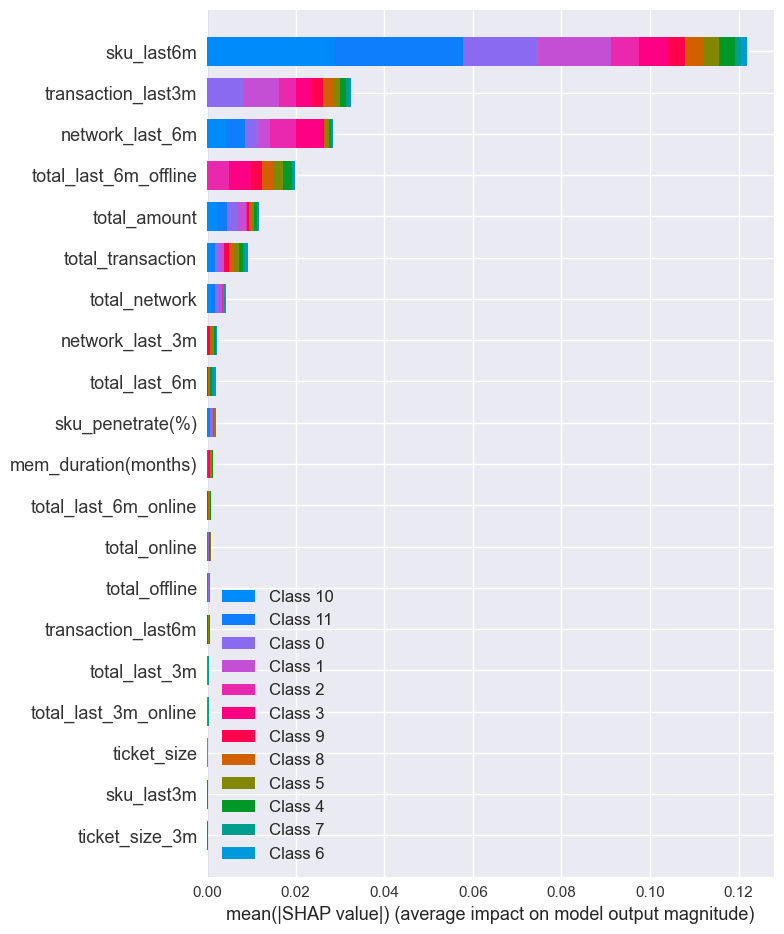

In [55]:
# Make plot. Index of [0] is explained in text below.
shap.summary_plot(shap_values, X_test)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


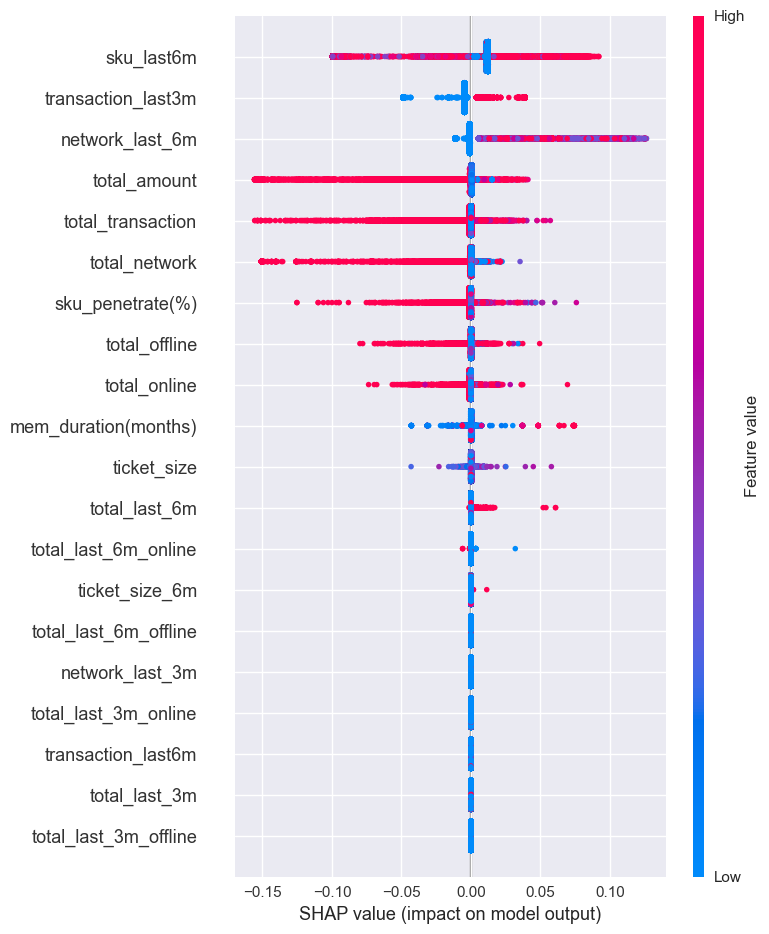

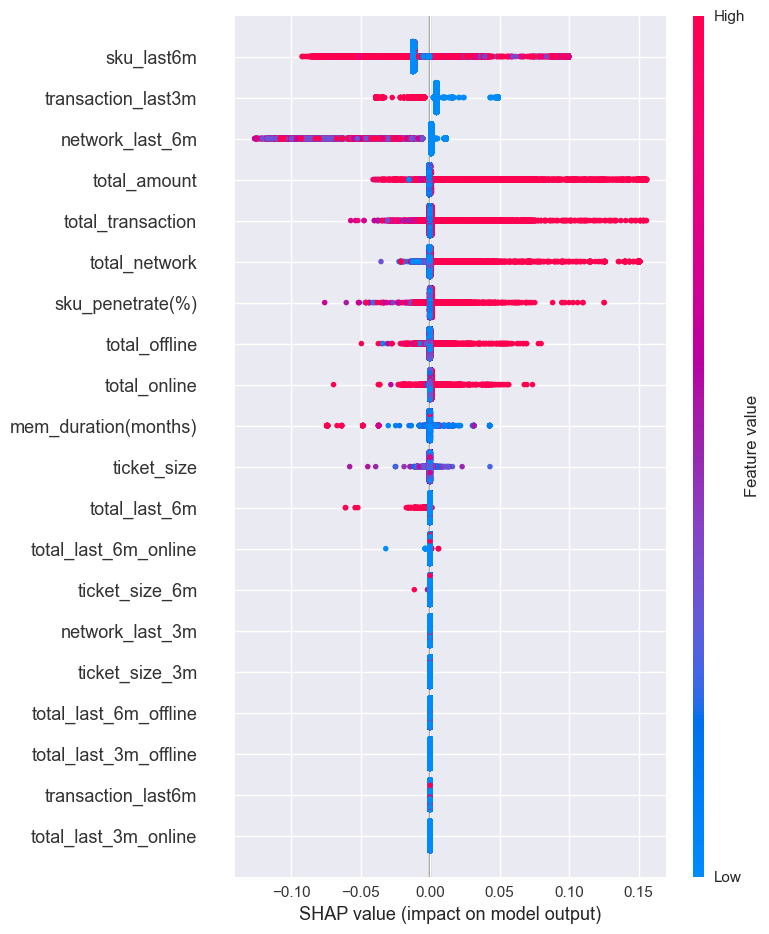

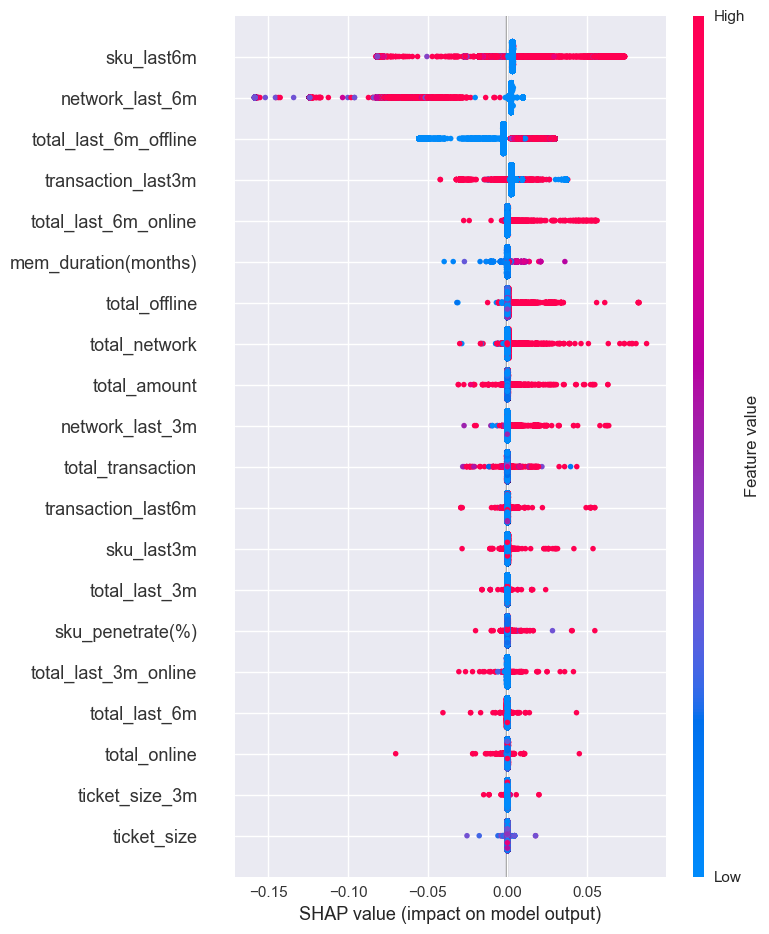

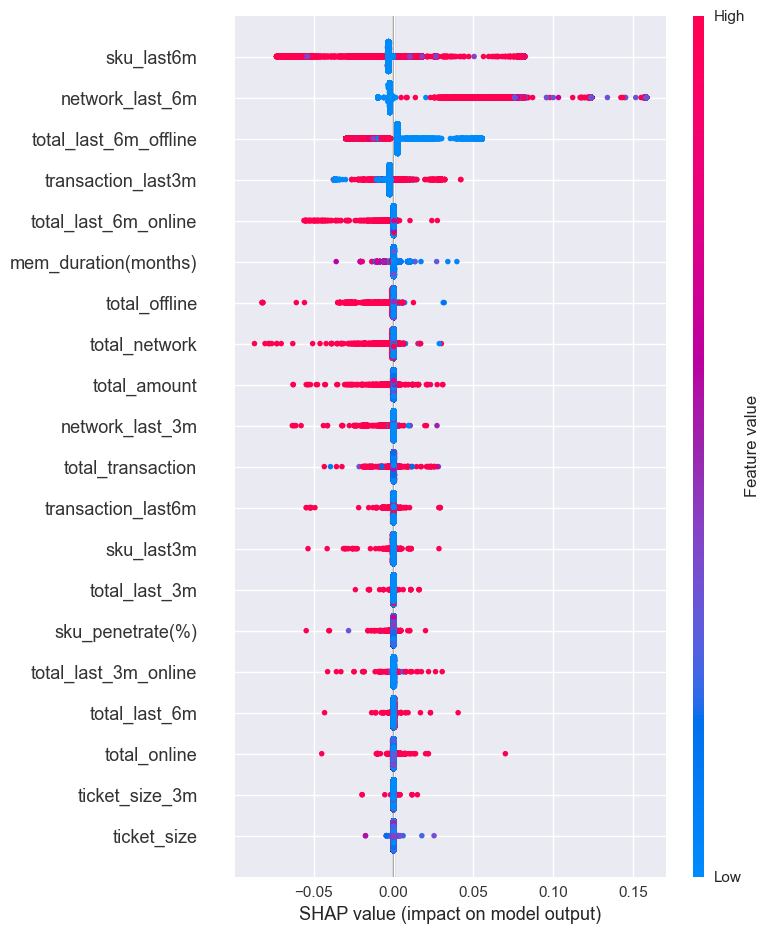

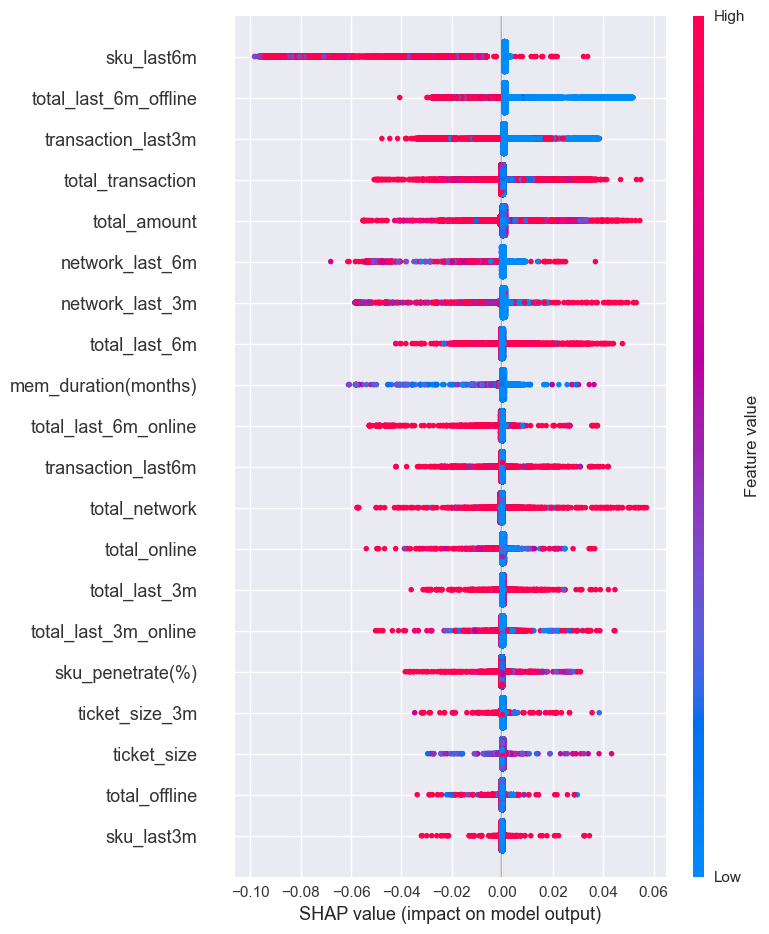

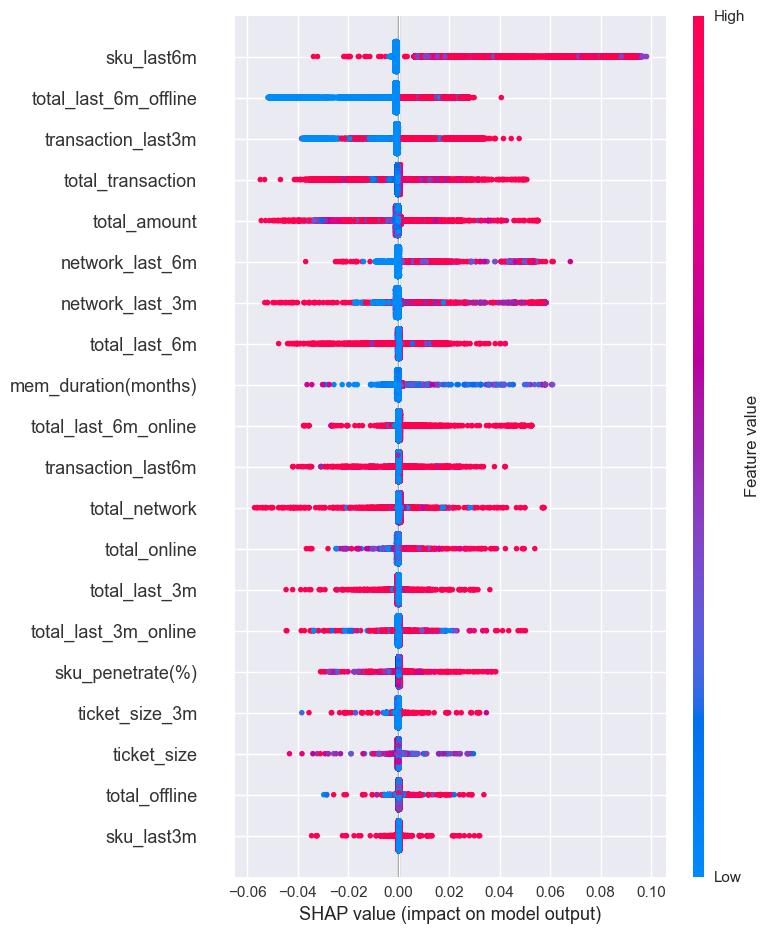

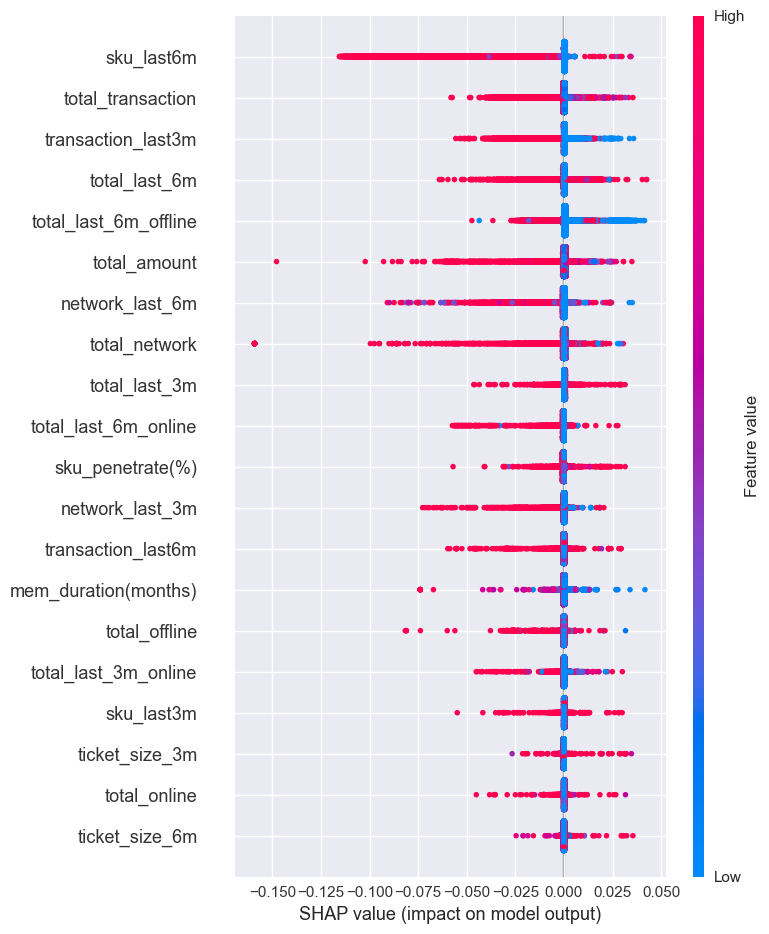

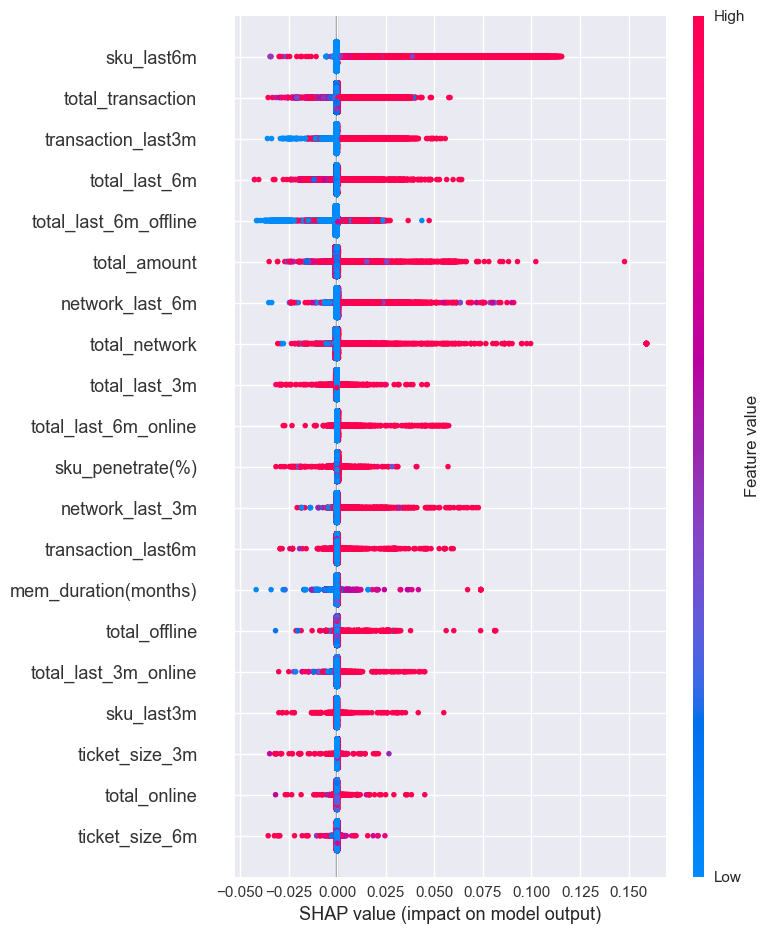

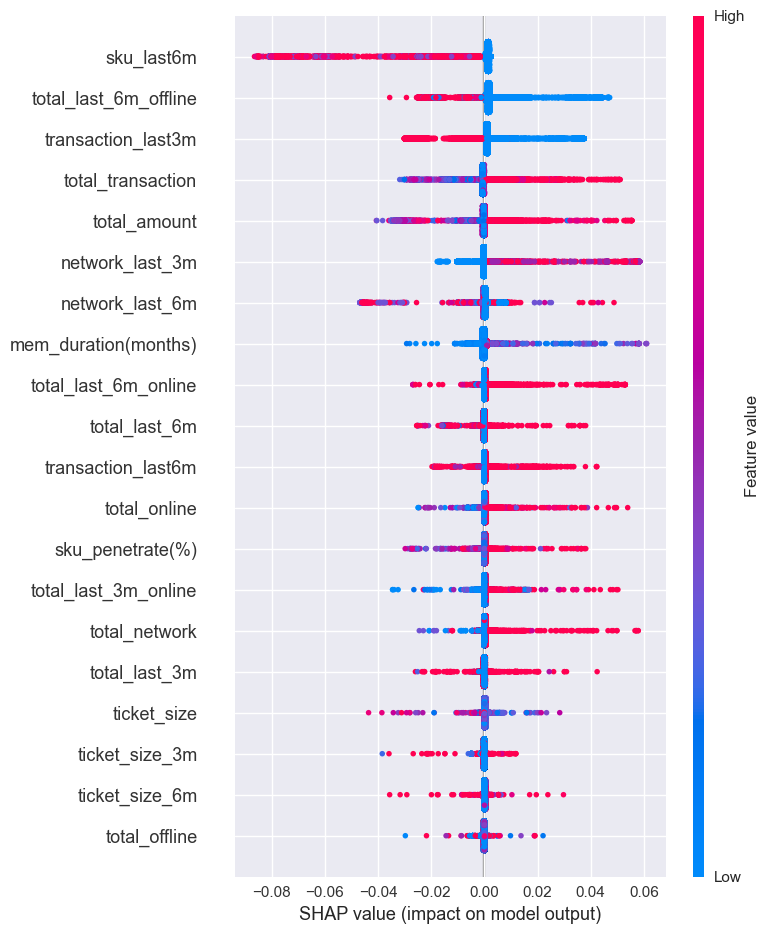

In [61]:
for clas in range(0,13):
    shap.summary_plot(shap_values[clas], X_test)